# **AP157 Machine Learning Lab Assignment**
## Module A.3: Dimensionality Reduction -- Principal Component Analysis of SDSS Galaxy Spectra

_Instructions_: Answer each part of the assignment as completely as you can. Discuss **all** your code and results as clearly and concisely as possible.

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Parts 1 and 2 are worth 25 and 75 points, respectively).

_Credits_: This assignment is based on the scikit-learn tutorial "Dimensionality Reduction of Astronomical Spectra" ([link](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html))

### Student Information

_Full Name (Last Name, First Name)_: Manliguez, Sean Arthur \
_Student No._: 2020-07582\
_Section_: TX - 1

### Submission Information

_Date and Time Submitted (most recent upload)_:

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name:** SEAN ARTHUR C. MANLIGUEZ

### Grading Information (c/o Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Part 1 - []/25
* Part 2 - []/75

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_

For this assignment, you will work with galaxy spectra data from the
Sloan Digital Sky Survey (SDSS). First, you need to make a copy of the file ```spec4000_use.npz``` and save it to a folder in your **own Google Drive**. This file is available from the AP157 Machine Learning Google Drive (under the Datasets folder).

The code cells below will (1) mount your Google Drive and (2) load ```spec4000_corrected.npz``` from your Google Drive folder.

First, mount the Google Drive where you saved the .npy file.

When you run this cell, you will be asked to sign in to your Google account and you will get an authorization code. Paste the code on the provided cell to mount the Google Drive.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run this command to list the directories in your Google Drive and check that the mount was successful.

In [2]:
#!ls drive/My\ Drive

Define the directory path to the location of the file, i.e. if it is in a
folder named "AP157" under My Drive, then the file path will be "/content/drive/My Drive/AP157". Change the string variable in the code cell below, as needed:

In [3]:
file_path = "/content/drive/My Drive/AP157/Datasets/"

Now, we can load the file using $\tt numpy$'s $\tt load$ function below.


In [4]:
import numpy as np
data = np.load(file_path + 'spec4000_corrected.npz')

The NpzFile object is a dictionary-like object which can be queried for its list of arrays and the arrays themselves ([reference](https://numpy.org/doc/stable/reference/generated/numpy.savez.html)). Our object contains two arrays: ``spec_recons`` - 4000 reconstructed SDSS spectra each with 1000 attributes (flux in units of $10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$) and ``wavelength`` - array of wavelengths (in units of Angstroms) corresponding to these attributes.

In [5]:
data.files

['spec_recons', 'wavelength']

In [6]:
np.shape(data['spec_recons']), np.shape(data['wavelength'])

((4000, 1000), (1000,))

Let's plot the first few spectra to visualize our data

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Sample SDSS spectra')

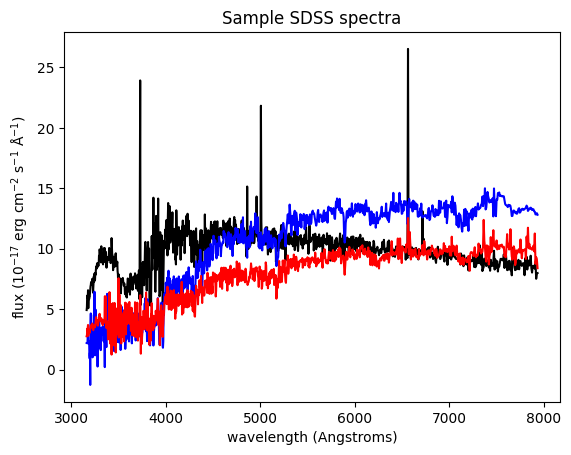

In [8]:
wavelength = data['wavelength']
flux0 = data['spec_recons'][0,:]
flux1 = data['spec_recons'][1,:]
flux2 = data['spec_recons'][2,:]

plt.plot(wavelength, flux0, 'k-')
plt.plot(wavelength, flux1, 'b-')
plt.plot(wavelength, flux2, 'r-')
plt.ylabel("flux ($10^{-17}$ erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$)")
plt.xlabel("wavelength (Angstroms)")
plt.title("Sample SDSS spectra")

#### PART 1 - Get mean normalized spectrum *(25 pts.)*

Plot the mean spectrum by first normalizing the spectra and plot the mean and standard deviation. For this, you may use the ``normalize`` function in scikit-learn's preprocessing module [(documentation)](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html). Describe the mean spectrum and note wavelengths with the highest variation across the sample. What is the reason for this variation?


In [9]:
#importing necessary libraries
from sklearn import preprocessing #for mean and std
from sklearn.preprocessing import normalize #for normalizing the data
import matplotlib.pyplot as plt # for plotting

In [10]:
spec_data = data['spec_recons']

## Normalizing the Spectrum

In [12]:
norm_spec = normalize(spec_data) #normalizes the spectrum data
mu_spec = norm_spec.mean(0) #determines the mean of the normalized spectrum data
std_spec = norm_spec.std(0) #determines the standard deviation of the normalized specturm data

(4000, 1000)


### Plotting the mean spectrum

Based on the sample SDSS Spectra plot above, it is expected for the plot of the standard deviation of the spectral data to also contain peaks at various points. In other words, the spectral data has high variability in certain wavelengths.  In order to identify these peaks, `find_peaks` function of the `scipy.signal` library was used.

In [52]:
from scipy.signal import find_peaks #finding peaks in the graph
upper_std = mu_spec + std_spec #upper limit of the standard deviation
lower_std = mu_spec - std_spec #lower limit of the standard deviation
peaks, _ = find_peaks(upper_std, height = 0.05) #finding peaks with the height of at least 0.5

From the plot below, there exists 7 prominent peaks in the standard deviation, with the most prominent one found at the wavelength of $6564.48 Å$. These large variations can be attributed to "the wavelengths at which Hydrogen absorbs and emits photons" (Scikit Learn, 2010).

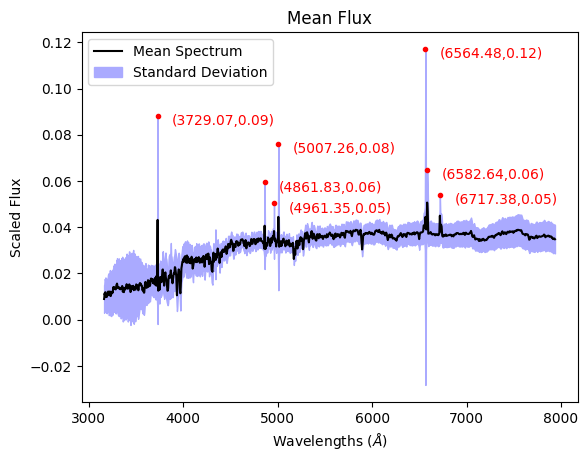

In [53]:
plt.plot(wavelength, mu_spec, c = 'black', label = "Mean Spectrum")
plt.fill_between(wavelength, lower_std, upper_std, color='#AAAAFF', label ='Standard Deviation')
plt.plot(wavelength[peaks], upper_std[peaks], '.', color = 'r')
for x,y in zip(wavelength[peaks],upper_std[peaks]):
    label = "({:.2f},{:.2f})".format(x, y)
    plt.annotate(label, # this is the text
                 (x + 700, y - 0.01), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center', color = 'r') # horizontal alignment can be left, right or center
plt.xlabel("Wavelengths ($\AA$)")
plt.ylabel("Scaled Flux")
plt.title("Mean Flux")
plt.legend()
plt.show()

## Trials

<ipython-input-55-0673931005d0>:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'vmin', 'vmax' will be ignored
  plt.scatter(spec_data[:, i1], spec_data[:, 2], s=4, lw=0, vmin=2, vmax=6, cmap=plt.cm.jet)


Text(0.5, 1.0, 'Random Pair of Spectra Bins')

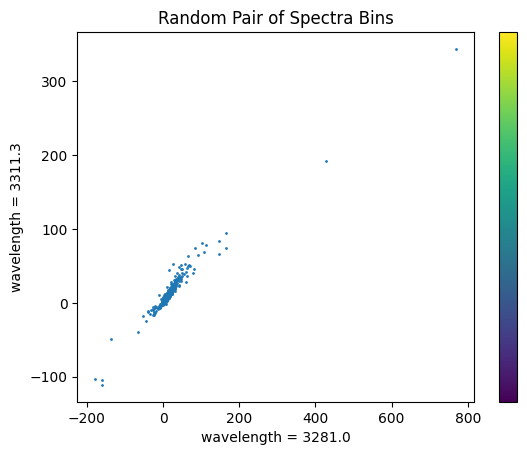

In [55]:
plt.figure()
np.random.seed(25255)  # this seed is chosen to emphasize correlation
i1, i2 = np.random.randint(1000, size=2)
plt.scatter(spec_data[:, i1], spec_data[:, 2], s=4, lw=0, vmin=2, vmax=6, cmap=plt.cm.jet)
plt.colorbar(ticks = range(2, 7))
plt.xlabel('wavelength = %.1f' %wavelength[i1])
plt.ylabel('wavelength = %.1f' %wavelength[i2])
plt.title('Random Pair of Spectra Bins')

#### PART 2 - Get principal components *(75 pts.)*

Perform Principal Component Analysis (PCA) and visualize the top principal components:
1. Get the first 4 principal components using the ``PCA`` function in scikit-learn's decomposition module [(documentation)](https://scikit-learn.org/0.15/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA). Make sure to use the normalized spectra as input. *(25 pts.)*


In [19]:
from sklearn.decomposition import PCA #for getting the principal components

# Eigenvectors and Eigenvalues

The array **`eigenvectors` stores the eigenvectors** of the first 4 principal component, while **`eigenvalues` stores its corresponding eigenvalues**. For each principal component, it's corresponding **percent variance is given by `variance_ratio`**.
From this, it is evident that *the first component has the highest percent variance followed by the second component*. It can then be inferred that the first and second contributes largely to the approximation of the data (Sartorius, 2020).

The total variance of the four principal components is given by `total_variance` with a value of $\approx 0.8557$. This means that the first four principal components accounts for $85.57\%$ of the variance of the data.

Linear dimensionality reduction was done using `PCA()`, which projects the data from 1000 attributes into 4 components, `n_components = 4`/



In [56]:
pca = PCA(n_components = 4) #initializing the dimensionality reduction, with 4 components
pca.fit(norm_spec) #fits the normalized spectrum into the principal components

eigenvectors = pca.components_
eigenvalues = pca.explained_variance_
variance_ratio = pca.explained_variance_ratio_
total_variance = variance_ratio.sum()

print(f"Eigenvectors: {eigenvectors}")
print(f"Eigenvalues: {eigenvalues}")
print(f"Variance Ratio: {variance_ratio}")
print(f"Total Variance: {total_variance}")

Eigenvectors: [[ 0.02895173  0.02773597  0.02966308 ... -0.03035117 -0.03061469
  -0.03018621]
 [-0.02716067 -0.02713246 -0.02791857 ... -0.02968383 -0.03048456
  -0.03016255]
 [-0.00215703  0.0005521  -0.00155985 ... -0.00420361 -0.00459899
  -0.00529335]
 [ 0.00285703  0.00090973 -0.00044632 ... -0.01567627 -0.01567296
  -0.01491886]]
Eigenvalues: [0.02173596 0.01195034 0.00503923 0.00339751]
Variance Ratio: [0.4415291  0.24275087 0.1023634  0.0690146 ]
Total Variance: 0.8556579947471619


2. Plot the first two principal components (coefficient 1 in the x axis and coefficient 2 in the y axis). Make sure to label the axes and good to set x and y axis limits to be equal. *(25 pts.)*

# Projecting the spectral data into the four principal components

The code below transforms the shape of the data from the 1000 attributes it original has into just 4 principal components by taking advantage of their correlations.

In [21]:
projected = pca.fit_transform(norm_spec)

The code below shows the shape of the normalized spectrum before and after dimensionality reduction. A data containing 1000 attributes was projected into just 4 attributes (e.g. Principal Components).

In [35]:
print(f"Shape of the normalized spectrum: {norm_spec.shape}")
print(f"Shape of the normalized spectrum with dimensionality reduction: {projected.shape}")

Shape of the normalized spectrum: (4000, 1000)
Shape of the normalized spectrum with dimensionality reduction: (4000, 4)


# Plot of the first two principal components

It can be observed, that the data points now gather around the origin and spreads widely along the axis of the first component. This is as expected given that the variance of the first component is higher than the second component.

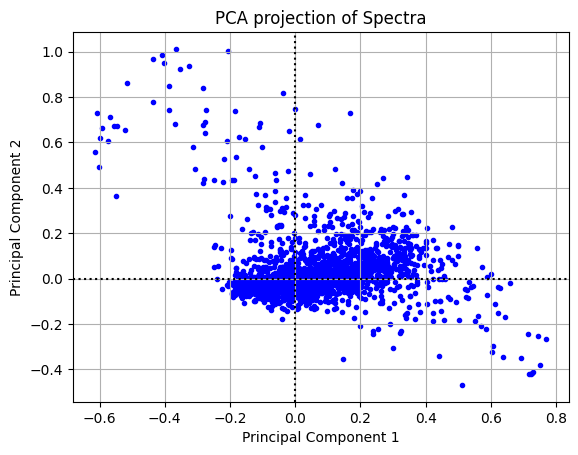

In [34]:
plt.figure()
plt.scatter(projected[:, 0], projected[:, 1], marker = '.', c = 'b') #plotting the first component in x-axis, the second component in the y-axis
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA projection of Spectra')
plt.axhline(y=0, color='k', ls = ':') #line for the x-axis origin
plt.axvline(x=0, color='k', ls = ':') #line for the y-axis origin
plt.grid()

3. Plot the first 4 eigenvectors together with the mean spectrum. Add an arbitrary y-offset between the spectra for clarity. *(25 pts.)*

Text(0.5, 1.0, 'Mean Spectrum and Eigen-spectra')

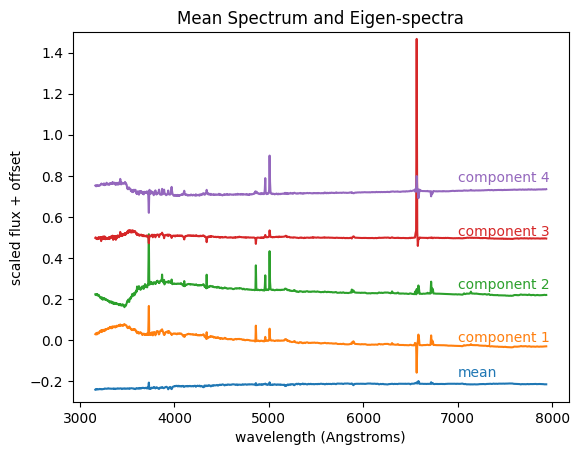

In [26]:
 plt.figure()
l = plt.plot(wavelength, pca.mean_ - 0.25)
c = l[0].get_color()
plt.text(7000, -0.18, "mean", color=c)
for i in range(4):
     #plt.text(7000, -0.16, "mean" % i, color=c)
     l = plt.plot(wavelength, pca.components_[i] + 0.25 * i)
     c = l[0].get_color()
     plt.text(7000, -0.01 + 0.26 * i, "component %i" % (i + 1), color=c)
plt.ylim(-0.3, 1.5)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('scaled flux + offset')
plt.title('Mean Spectrum and Eigen-spectra')

# References:


*   Sartorius. (2020). What is Principal Component Analysis (PCA) and how it is used? Sartorius. https://www.sartorius.com/en/knowledge/science-snippets/what-is-principal-component-analysis-pca-and-how-it-is-used-507186#:~:text=The%20first%20principal%20component%20(PC1)%20is%20the%20line%20that%20best,is%20known%20as%20a%20score.
* 2.3.6. Dimensionality Reduction of Astronomical Spectra — scikit-learn 0.11-git documentation. (2010). https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/dimensionality_reduction.html


